# Model Evaluation

Model validation is group of techniques for evaluating machine learning models on a limited data sample. It has different goals:

* To estimate how well the model will generalize to an independent data sample.
* To provide a more realistic performance estimate than training accuracy.
* To choose between competing models.
* To choose optimal model hyperparameters.


# What process will we adopt?
We will compare the different model validation techniques by following the same process:
* generate a dataset with specific characteristics
* select the best features
* create appropriate train, validation and test sets.
* use a simple model, namely Logistic Regression.

## Generated dataset
SciKit learn offers a functions to generate datasets for testing machine learning algorithms. We will use the dataset generated by `make_classification` to test our models. Some parameters control the number of samples, the number of features, the number of classes and the number of informative features.

The weights parameter allows to control the **class imbalance**. Class imbalance is a common problem in machine learning. It occurs when the number of samples in one class is **much higher** than the number of samples in the other classes.

> Suprisingly, many phenomena in the real world are characterized by class imbalance. For example, in fraud detection, the number of fraudulent transactions is much lower than the number of normal transactions. In medical diagnosis, the number of healthy patients is much higher than the number of sick patients. In this case, the model will get biased towards the majority class. A so-called **majority class classifier** can achieve a high accuracy by simply predicting the majority class all the time. Due to the class imbalance, this is a very high accuracy, but the model is **useless**. Other evaluation measures like precision, recall and f-measure correctly assess the quality of the model. So, it is important to detect class imbalance and to use appropriate techniques to deal with it.

In our case, we will generate a dataset with 80% of samples in the first class and 20% of samples in the second class. The class_sep parameter controls the ratio of the standard deviation of the clusters to the standard deviation of the data points within the clusters. The higher the value, the more the clusters are separated. The **more difficult** the classification problem will be.

If you like to learn more about these functions, you can read the [documentation](https://scikit-learn.org/stable/datasets/sample_generators.html#generated-datasets).

In [10]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate a random binary classification problem
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, weights=[0.8, 0.2], flip_y=0.01, class_sep=1.0,
                           hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

# Convert to pandas dataframe
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
data['target'] = y
data.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,target
0,-1.497498,-0.299608,-1.219989,1.681631,-0.990179,-0.432622,-0.227664,-0.689011,-0.124279,-1.111270,...,-0.169534,-0.275310,2.190289,0.391065,0.359307,-0.955901,-0.704811,0.775147,-0.397073,1
1,1.534934,-0.166541,0.300961,0.444717,0.905650,-1.009402,1.158062,1.746321,0.633632,-0.405843,...,2.357880,-0.374774,-2.454937,-0.174250,3.112953,-0.460844,-0.285499,-0.831639,0.260672,0
2,-0.275462,0.170693,-1.173447,-2.549926,-0.310781,-0.047132,-1.243003,-0.248716,0.857717,1.577051,...,0.235457,0.859407,2.905283,0.320668,1.073274,-1.916580,-0.066942,1.170951,1.671492,0
3,1.373582,-1.200772,-1.559655,1.768709,0.392348,0.165043,-0.284057,0.007847,0.952752,1.133455,...,-0.204472,1.055510,-2.548346,0.265981,0.712069,-2.533506,1.112621,-0.045173,-0.011757,0
4,1.503549,0.719534,2.485566,-1.963150,0.213347,0.091418,-1.095687,1.167156,1.294975,1.459599,...,1.462663,-1.182586,-0.125499,-1.179403,-1.497323,-0.097872,1.113954,-0.889784,1.844313,1


## Class distribution

Let's have a look at the class distribution of the generated dataset. We can see that the class distribution is indeed around 80% for the first class and 20% for the second class.

In [11]:
# check out the class distribution
pd.Series(y).value_counts(normalize=True) * 100

0    79.8
1    20.2
dtype: float64

## Data set size
As a rule of thumb the size of dataset should be an **order of magnitude larger** than the number of features. In our case, we have 1000 samples ($10^3$) and 20 features ($2 \cdot 10^1$), so we have enough data to train a model.

# Bias - Variance Tradeoff

Overfitting and underfitting are two common problems in machine learning. They are related to the bias-variance tradeoff. A model with high bias pays little attention to the training data and oversimplifies the model. A model with high variance pays too much attention to the training data and overfits it. The goal is to find a sweet spot in the middle with a model that has low bias and low variance.

A model that **overfits** data is a model that models the training data too well. It is able to predict the training data very well, but it is not able to generalize to new data. This is a problem because the model will not perform well on new data. The model is too complex and has learned the noise in the training data. The model will have high variance.

A model that **underfits** the data is a model that does not capture the underlying structure of the data. It is not able to predict the training data well. This is also a problem because the model will not perform well on new data. The model is too simple and has not learned the relevant structure in the training data. This is called underfitting. The model will have high bias.


### Simple Bias-Variance Tradeoff example

See slides for more details.

In [8]:
import numpy as np

scale_weights = np.array([65.4, 61.5, 62.5])
bias = scale_weights.mean() - 62
variance = ((scale_weights - scale_weights.mean()) ** 2).sum() / scale_weights.size
mse = ((scale_weights - 62) ** 2).mean()
print(f'Bias²: {bias ** 2:.2f} +  Variance: {variance:.2f} = MSE: {mse:.2f}')

Bias²: 1.28 +  Variance: 2.74 = MSE: 4.02


## Finding the sweet spot

Finding the sweet spot is a matter of **tradeoff**. A model with low bias and low variance is a model that is able to generalize well to new data. This is the ideal scenario. A model with low bias and high variance is a model that is able to predict the training data well, but it is not able to generalize to new data. A model with high bias and low variance is a model that is not able to predict the training data well, but it is able to generalize to new data, but still underperformss.  A model with high bias and high variance is a model that is not able to predict the training data well, and it is even not able to generalize to new data.

A model with high bias is said to be **underfitting**. A model with high variance is said to be **overfitting**. The goal is to find a model that has both reasonable low bias and low variance. This is the sweet spot.

### Data Splitting Techniques
To counteract **overfitting**, we can use data splitting techniques. We split the original data into a:
* **Training set**: The data used to fit the model. Overfitting occurs when the model fits the training data too well.
* **Validation set**: The data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. If the model performs well on the validation set, it is likely to perform well on new data and no overfitting has occurred.
* **Test set**: The data used to provide an unbiased evaluation of a **final model** fit on the training dataset.

By partitioning or splitting the available data into these three sets, we can avoid **overfitting** the model to the training data. The model is trained on the training set and evaluated on the validation set. The best model is chosen based on the performance on the validation set. The final performance of this best model is then evaluated on the test set, and this is the performance that we report.

*<u>Note</u>: In the literature, the validation set is sometimes called the test set. This is a misnomer, as the test set is used to provide an **unbiased evaluation** of the final model fit on the training dataset. The validation set is used to **evaluate the model and tune its hyperparameters**. Even the documentation of scikit-learn uses the term test set to refer to the validation set. This is a source of confusion and should be avoided.*


### Feature Engineering Techniques

Feature Engineering also helps to improve the performance and stability of the model. It is a process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

See the **separate notebook** (Feature Engineering.ipynb) on Feature Engineering for more details and examples.

## The Model
We will use logistic regression as our model. Logistic regression is a linear model for classification. It is a good starting point for binary classification problems. If you like to learn more about logistic regression, you can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Note: despite its name, logistic regression is a linear model for **classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

So, don't **confuse** logistic regression with linear regression!

In the general case, you'll use multiple models to find the best one. You can use the **validation set** to evaluate the performance of the different models. The model with the best performance on the validation set is the one that you will use to make predictions on the test set.

In [4]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()
model

LogisticRegression()

# Data splitting techniques

## Holdout
Holdout is the simplest form of model validation. It is a good starting point when you are working with limited data. It is also the default validation method in scikit-learn, keras, and other machine learning libraries.

The procedure is as follows:
* Shuffle the dataset randomly.
* Split the dataset into two groups, a rule of thumb is to use a 70%/30% split.
* Take the first group as a training set and the second group as a hold out set, also called the test set.
* Fit a model on the training set and evaluate it on the hold out set

![](../images/holdout.png)

The above procedure can be done by using the `train_test_split` function from scikit-learn. The function takes the dataset and the target as input and returns the training and test sets. The test_size parameter is used to specify the size of the test set. The random_state parameter is used to specify the random seed for shuffling the dataset. If you like to learn more about this function, you can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (700, 5), (700,)
Test set: (300, 5), (300,)


In [30]:
model.fit(X_train, y_train)
print(f'Train Accuracy: {model.score(X_train, y_train):.2f}')
print(f'Holdout Accuracy: {model.score(X_test, y_test):.2f}')
print('Our model performs quite well on the holdout set.')

Train Accuracy: 0.90
Holdout Accuracy: 0.89
Our model performs quite well on the holdout set.


## Holdout with validation set
Holdout can be improved by adding a validation set. The procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into three groups, a rule of thumb is to use a 60%/20%/20% split.
* Take the first group as a training set.
* Take the second group as a validation set.
* Take the third group as a test set.
* Fit multiple models on the training set and evaluate them on the validation set.
* Choose the **best model** based on the performance on the validation set.
* Evaluate the final model on the test set.
* Report the performance on the test set as the performance of the model.

![](../images/holdout%20with%20validation.png)

In [41]:
# apply train_test_split twice to create a train (60%), validation (20%) and test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (600, 5), (600,)
Validation set: (200, 5), (200,)
Test set: (200, 5), (200,)


## More than one validation set

To reduce variability, multiple rounds of validation are performed using different partitions, and the validation results are averaged over the rounds. This is called **cross-validation**. The rounds are called **folds**.

In [78]:
results = []
for _ in range(10):
    # apply train_test_split twice to create a train (60%), validation (20%) and test set (20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    results.append([train_score, val_score, train_score - val_score])

rounds = pd.DataFrame(results, columns=['train', 'validation', 'difference'], index=[f'Fold {i}' for i in range(1, 11)])
pd.concat([rounds.mean().rename('Average').to_frame().T, rounds], axis=0)

,train,validation,difference
Average,0.894667,0.8615,0.033167
Fold 1,0.905000,0.8550,0.050000
Fold 2,0.900000,0.8400,0.060000
Fold 3,0.886667,0.8750,0.011667
Fold 4,0.913333,0.8400,0.073333
Fold 5,0.910000,0.8700,0.040000
Fold 6,0.898333,0.8850,0.013333
Fold 7,0.886667,0.9000,-0.013333
Fold 8,0.888333,0.8550,0.033333
Fold 9,0.883333,0.8700,0.013333


### Cross-Validation
Instead of doing the cross-validation manually as we did in the previous section we will use the `cross_val_score` function from scikit-learn to perform K-fold cross-validation. The function takes the model, the dataset, and the target as input and returns the scores for each fold. The cv parameter is used to specify the number of folds. The scoring parameter is used to specify the scoring metric. If you like to learn more about this function, you can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

The reason we call this the basic version is it makes several assumptions about the dataset that are not always true. The assumptions are:
* The dataset is large enough.
* The observations are independent of each other.
* The observations are identically distributed.
* The observations are randomly sampled from the dataset.
* The observations are balanced.

More on this later.

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=6)
print(f'6-Fold Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
scores

6-Fold Cross-Validation Accuracy: 0.88 (+/- 0.02)


array([0.89820359, 0.89820359, 0.88622754, 0.88622754, 0.84337349,
       0.87951807])

In [33]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X, y, cv=6, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.015114,0.000000,0.898204,0.887155
1,0.005326,0.005132,0.898204,0.882353
2,0.004780,0.004622,0.886228,0.889556
3,0.005245,0.000000,0.886228,0.884754
4,0.007154,0.000000,0.843373,0.887290
5,0.000000,0.000000,0.879518,0.895683


### K-Fold Cross-Validation

K-fold cross-validation is a technique where the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once.

The procedure is as follows:
* Shuffle the dataset randomly.
* Split the dataset into $k$ groups
* For each of the $k$ groups:
    * Take a group as a holdout validation set
    * Combine the remaining $k-1$ groups as a training data set
    * Fit a model on the training set and evaluate it on the validation set
    * Retain the evaluation score and discard the model
    * Repeat for the next group
* The performance score is the average of the values computed in the loop
* The final model is evaluated on the test set

![](../images/k_fold.png)

If you like to learn more about this technique, you can read the [documentation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold).


In [34]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True)
scores = cross_val_score(model, X, y, cv=kf)
print(f'6-Fold Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')


6-Fold Cross-Validation Accuracy: 0.88 (+/- 0.03)


### What about class inbalance?

Some datasets have class inbalance. For example, in the Titanic dataset, the number of passengers who survived is much smaller than the number of passengers who did not survive. This can cause problems when we use the accuracy metric. The accuracy metric is the ratio of the number of correct predictions to the total number of predictions. If the number of correct predictions is much larger than the number of incorrect predictions, the accuracy metric will be high even if the model is not good. This is because the model is just predicting the majority class most of the time.

We can create a class inbalance dataset by using the `make_classification` function from scikit-learn by setting the weights parameter.

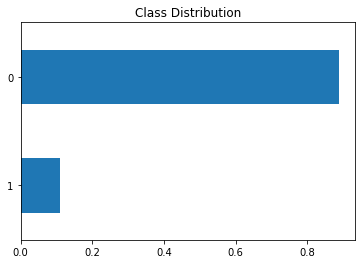

In [27]:
# Generate a random binary classification problem with class inbalance
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2, weights=[0.90, 0.10], flip_y=0.01, class_sep=1.0,
                           hypercube=True, shift=0.0, scale=1.0, shuffle=False)
_ = pd.Series(y).value_counts(normalize=True).sort_index(ascending=False).plot(kind='barh', title='Class Distribution')

### K-Fold Cross-Validation vs Stratified K-Fold Cross-Validation

The `KFold` function does not take the class distribution into account. This can cause problems when we use the accuracy metric. The `StratifiedKFold` function takes the class distribution into account. This can help us to get a more accurate estimate of the model performance. The `StratifiedKFold` function is a variation of the `KFold` function. The only difference is that the `StratifiedKFold` function makes sure that the class distribution is the same in each fold as it is in the whole dataset.

Let's do some counting using both methods. We'll define a function to do the counting.

In [28]:
def plot_class_counts(X, y, cv, ax):
    splits = pd.DataFrame()

    for i, (train_index, val_index) in enumerate(cv.split(X, y)):
        train_counts = [np.count_nonzero(y[train_index] == 0) / len(y[train_index]),
                        np.count_nonzero(y[train_index] == 1) / len(y[train_index])]
        val_counts = [np.count_nonzero(y[val_index] == 0) / len(y[val_index]),
                      np.count_nonzero(y[val_index] == 1) / len(y[val_index])]
        splits = pd.concat([splits,
                            pd.DataFrame({'train 0': train_counts[0],
                                          'train 1': train_counts[1],
                                          'val 0': val_counts[0],
                                          'val 1': val_counts[1]}, index=[f'Fold {i}'])])

    splits.plot(ax=ax, kind='barh', figsize=(20, 7), stacked=True,
                title=f'Class Distribution using {cv.__class__.__name__}')


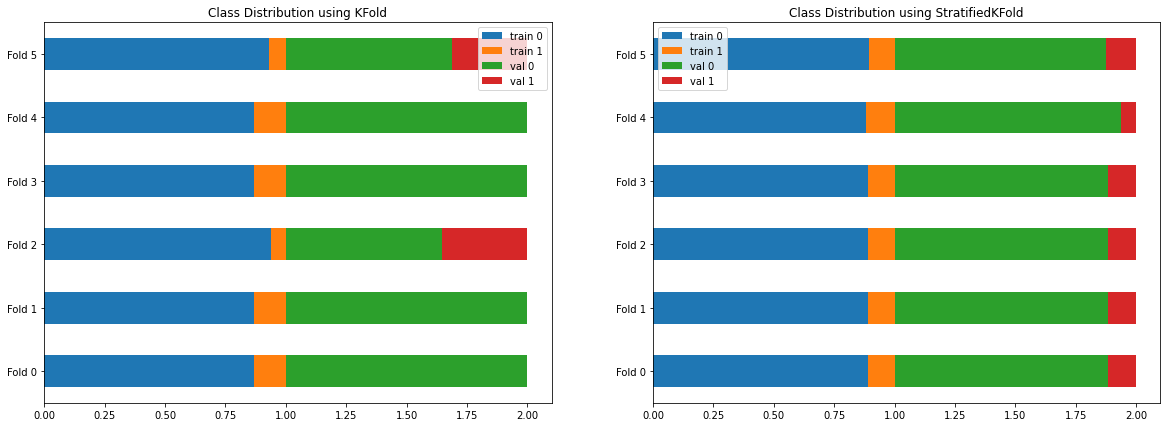

In [29]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 20))
kf = KFold(n_splits=6, shuffle=False)
ksf = StratifiedKFold(n_splits=6, shuffle=False)
plot_class_counts(X, y, kf, axes[0])
plot_class_counts(X, y, ksf, axes[1])


In [30]:
scores = cross_val_score(model, X, y, cv=kf)
print(f'6-Fold Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')
scores = cross_val_score(model, X, y, cv=ksf)
print(f'6-Fold Stratified Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})')


6-Fold Cross-Validation Accuracy: 0.85 (+/- 0.14)
6-Fold Stratified Cross-Validation Accuracy: 0.88 (+/- 0.08)


### Group K-Fold Cross-Validation

The `GroupKFold` function is a variation of the `KFold` function. The only difference is that the `GroupKFold` function makes sure that the same group is not in both the training and validation sets. This is useful when the observations are not independent of each other. For example, if we have a dataset of patients, and we want to predict whether a patient will have a heart attack, we can use the `GroupKFold` function to make sure that the **same patient** is not in both the training and validation sets. This is because we want to make sure that the model is not using information from the validation set to make predictions on the training set.

We will create a new and very simple dataset to demonstrate this. This dataset has an extra column called `group`. The `group` column is just a random number between 0 and 4. We will use the `GroupKFold` function to make sure that the same group is not in both the training and validation sets.

In [39]:
from sklearn.model_selection import GroupKFold

X = ['Subset1', 'Subset2', 'Subset3', 'Subset4', 'Subset5', 'Subset6', 'Subset7', 'Subset8', 'Subset9', 'Subset10']
groups = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
y = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
data = pd.DataFrame({'X': X, 'group': groups, 'y': y})
data

,X,group,y
0,Subset1,1,1
1,Subset2,1,0
2,Subset3,2,1
3,Subset4,2,0
4,Subset5,3,0
5,Subset6,3,1
6,Subset7,4,1
7,Subset8,4,0
8,Subset9,5,1
9,Subset10,5,0


In [41]:
grpkfold = GroupKFold(n_splits=5)
splits = pd.DataFrame()

for i, (train_index, val_index) in enumerate(grpkfold.split(X, y, groups=groups)):
    splits = pd.concat([splits,
                        pd.DataFrame({'groups in train': [data.iloc[train_index]['group'].unique()],
                                      'groups in val': [data.iloc[val_index]['group'].unique()]}, index=[f'Fold {i}'])])
splits

,groups in train,groups in val
Fold 0,"[1, 2, 3, 4]",[5]
Fold 1,"[1, 2, 3, 5]",[4]
Fold 2,"[1, 2, 4, 5]",[3]
Fold 3,"[1, 3, 4, 5]",[2]
Fold 4,"[2, 3, 4, 5]",[1]


### Time Series Cross-Validation
Time series cross-validation is a special case of K-fold cross-validation where the observations are ordered by time. Think of stock market data. We want to make sure that we don't use future data to predict the past. This is why we need to use time series cross-validation. This also means that the observations should not be randomly sampled from the dataset.

This method is not recommended to use _unless_ you have a time series dataset.


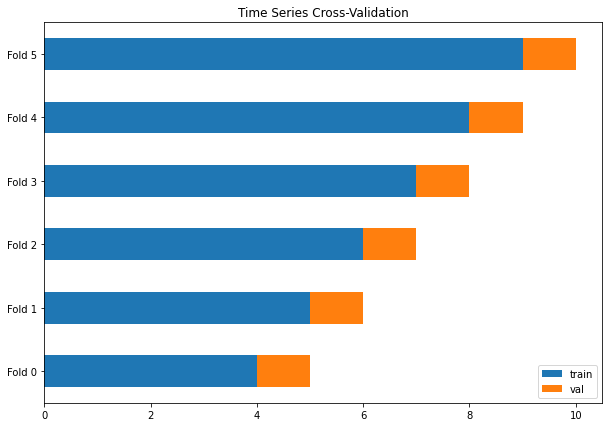

In [33]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=6)
splits = pd.DataFrame()

for i, (train_index, val_index) in enumerate(tscv.split(X)):
    splits = pd.concat([splits,
                        pd.DataFrame({'train': train_index.size,
                                      'val': val_index.size}, index=[f'Fold {i}'])])

_ = splits.plot(kind='barh', figsize=(10, 7), stacked=True, title='Time Series Cross-Validation')


### Leave-One-Out Cross-Validation

Leave-one-out cross-validation is a special case of K-fold cross-validation where K is equal to the number of observations in the dataset. This means that each observation is used as the validation set once. This method is very computationally expensive. It is not recommended to use this method unless you have a **very small** dataset.


### Leave-P-Out Cross-Validation

Leave-P-out cross-validation is a special case of K-fold cross-validation where K is equal to the number of observations in the dataset minus P. This means that each observation is used as the validation set once. This method is very computationally expensive. It is not recommended to use this method unless you have a very small dataset.


# References

> [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)
> [Top 7 Cross-Validation Techniques with Python Code](https://www.analyticsvidhya.com/blog/2021/11/top-7-cross-validation-techniques-with-python-code/)
> [Cross-Validation Techniques](https://medium.com/geekculture/cross-validation-techniques-33d389897878)
> [Cross-Validation: A Gentle Introduction](https://machinelearningmastery.com/cross-validation/)
